<a href="https://colab.research.google.com/github/my-roki/KOSA_Fpht/blob/master/z_project/Keras_Architecture_DenseNet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###part 0
from tensorflow.keras import Input, layers, models
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.applications import DenseNet121

import numpy as np

In [2]:
#Xception 모델 불러오기
pre_trained_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
pre_trained_densenet.trainable = False
pre_trained_densenet.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [3]:
# 밑에 레이어 추가
from tensorflow import keras

model = models.Sequential()
model.add(pre_trained_densenet)
model.add(layers.Flatten())
model.add(layers.Dense(4096, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

callbacks_list = [keras.callbacks.EarlyStopping(monitor = 'val_acc',
                                                patience = 5),
                 keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                    monitor = 'val_loss',
                                                    save_best_only = True)]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 8, 8, 1024)        7037504   
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              268439552 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2

In [4]:
### part 2


X_train, X_test, y_train, y_test = np.load('3rdtrial.npy', allow_pickle=True)

print(X_train.shape)

X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

history = model.fit(X_train, y_train, batch_size = 16, epochs = 50, callbacks=callbacks_list, validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test)

(506, 256, 256, 3)
Epoch 1/50
32/32 [==============================] - 69s 2s/step - loss: 589.1003 - acc: 0.6660 - val_loss: 278.7799 - val_acc: 1.0000
Epoch 2/50
32/32 [==============================] - 81s 3s/step - loss: 200.6545 - acc: 0.9802 - val_loss: 148.0933 - val_acc: 1.0000
Epoch 3/50
32/32 [==============================] - 84s 3s/step - loss: 125.7087 - acc: 0.9921 - val_loss: 112.2475 - val_acc: 0.9763
Epoch 4/50
32/32 [==============================] - 86s 3s/step - loss: 109.0871 - acc: 0.9447 - val_loss: 103.8813 - val_acc: 0.9527
Epoch 5/50
32/32 [==============================] - 84s 3s/step - loss: 102.7661 - acc: 0.9407 - val_loss: 99.0951 - val_acc: 1.0000
Epoch 6/50
6/6 [==============================] - 1s 116ms/step - loss: 90.4580 - acc: 1.0000


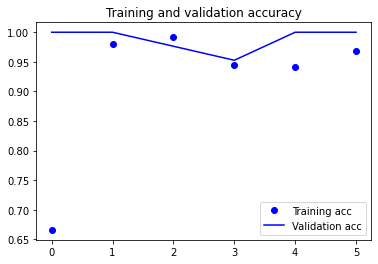

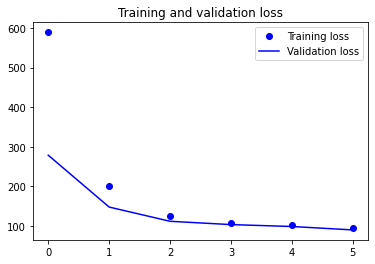

In [5]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
### part 3 이미지 잘 분류하나 확인하기

from tensorflow.keras.preprocessing import image


img = image.load_img('hui1.jpg', target_size=(256, 256))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[1.0000000e+00, 1.6906304e-21, 9.1901400e-13, 3.7808107e-12]],
      dtype=float32)

In [7]:
from tensorflow.keras.preprocessing import image


img = image.load_img('rok1.jpg', target_size=(256, 256))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[8.5702533e-04, 8.3116950e-13, 9.9740195e-01, 1.7409992e-03]],
      dtype=float32)

In [8]:
from tensorflow.keras.preprocessing import image


img = image.load_img('sk1.jpg', target_size=(256, 256))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[1.666098e-27, 0.000000e+00, 1.000000e+00, 0.000000e+00]],
      dtype=float32)

In [9]:
from tensorflow.keras.preprocessing import image


img = image.load_img('yang1.jpg', target_size=(256, 256))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[8.1334311e-20, 1.7091692e-29, 2.3175146e-24, 1.0000000e+00]],
      dtype=float32)

In [10]:
from tensorflow.keras.preprocessing import image


img = image.load_img('yo1.jpg', target_size=(256, 256)) #경욱이
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[5.5454595e-05, 3.5119704e-16, 9.9994457e-01, 3.5388541e-12]],
      dtype=float32)